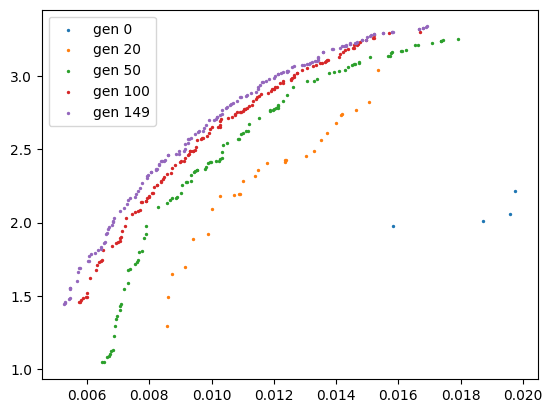

In [1]:
from matplotlib import pyplot as plt
import pickle
import numpy as np

run = '03'
def print_pop():
    gens = [0, 20, 50, 100, 149]
    fig, ax = plt.subplots()
    for gen in gens:        
        with open(f"data/runs/{run}/checkpoint_name_gen_{gen}.pkl", "rb") as cp_file:
            cp = pickle.load(cp_file)
            population = cp["population"]
            pareto = cp["pareto"]
            front = np.array([ind.fitness.values for ind in pareto if ind.fitness.values[0] <= 0.02 and ind.fitness.values[1] >= 0.9])
            ax.scatter(front[:,0], front[:,1], s=2, label=f"gen {gen}")
    ax.legend()
    plt.show()

print_pop()

Final population hypervolume is 157.637347


d:\VSCode Projects\airfoil-optimization-ga\.venv\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
d:\VSCode Projects\airfoil-optimization-ga\.venv\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


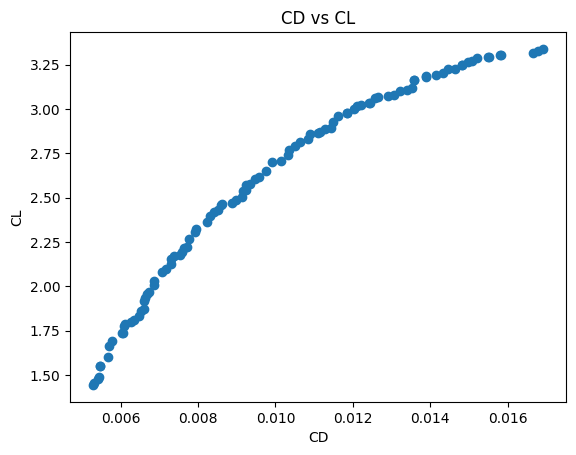

In [2]:

import matplotlib.pyplot as plt
import numpy
from nsga2 import main
gen = 149
population, stats = main(checkpoint=f'data/runs/{run}/checkpoint_name_gen_{gen}.pkl', max_gen=gen-1)
front = numpy.array([ind.fitness.values for ind in population])
# optimal_front = numpy.array(optimal_front)
# plt.scatter(optimal_front[:,0], optimal_front[:,1], c="r")
cd = front[:, 0]
cl = front[:, 1]
fig, ax = plt.subplots()
ax.scatter(cd, cl)
ax.set_xlabel("CD")
ax.set_ylabel("CL")
ax.set_title("CD vs CL")
plt.show()

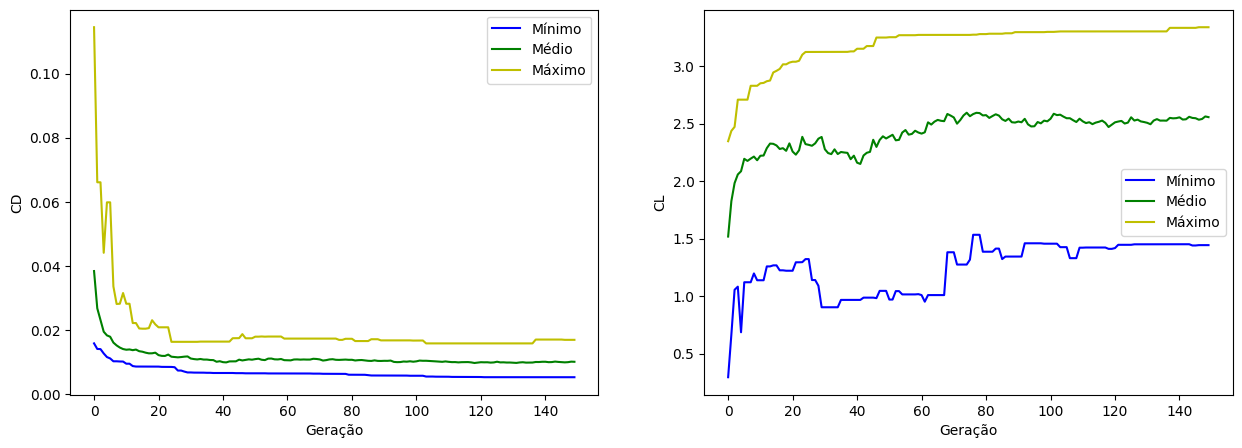

In [3]:
gen = stats.select("gen")
fit_avgs = stats.select("avg")
fit_mins = stats.select("min")
fit_maxes = stats.select("max")

cl_fits_avgs = [fit_avg[0] for fit_avg in fit_avgs]
cd_fits_avgs = [fit_avg[1] for fit_avg in fit_avgs]

cl_fits_mins = [fit_min[0] for fit_min in fit_mins]
cd_fits_mins = [fit_min[1] for fit_min in fit_mins]

cl_fits_maxes = [fit_max[0] for fit_max in fit_maxes]
cd_fits_maxes = [fit_max[1] for fit_max in fit_maxes]

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
ax1 = axs[0]
ax2 = axs[1]
line1 = ax1.plot(gen, cl_fits_mins, "b-", label="Mínimo")
line21 = ax2.plot(gen, cd_fits_mins, "b-", label="Mínimo")
ax1.set_xlabel("Geração")
ax1.set_ylabel("CD")
ax2.set_xlabel("Geração")
ax2.set_ylabel("CL")

# for tl in ax1.get_yticklabels():
#     tl.set_color("b")

# ax2 = ax1.twinx()
# line2 = ax2.plot(gen, size_avgs, "r-", label="Average Size")
# ax2.set_ylabel("Size", color="r")
# for tl in ax2.get_yticklabels():
#     tl.set_color("r")

line2 = ax1.plot(gen, cl_fits_avgs, "g-", label="Médio")
line22 = ax2.plot(gen, cd_fits_avgs, "g-", label="Médio")

line3 = ax1.plot(gen, cl_fits_maxes, "y-", label="Máximo")
line23 = ax2.plot(gen, cd_fits_maxes, "y-", label="Máximo")

lns = line1 + line2 + line3
lns2 = line21 + line22 + line23
labs = [l.get_label() for l in lns]
labs2 = [l.get_label() for l in lns2]
ax1.legend(lns, labs, loc="upper right")
ax2.legend(lns2, labs2, loc="center right")

plt.show()

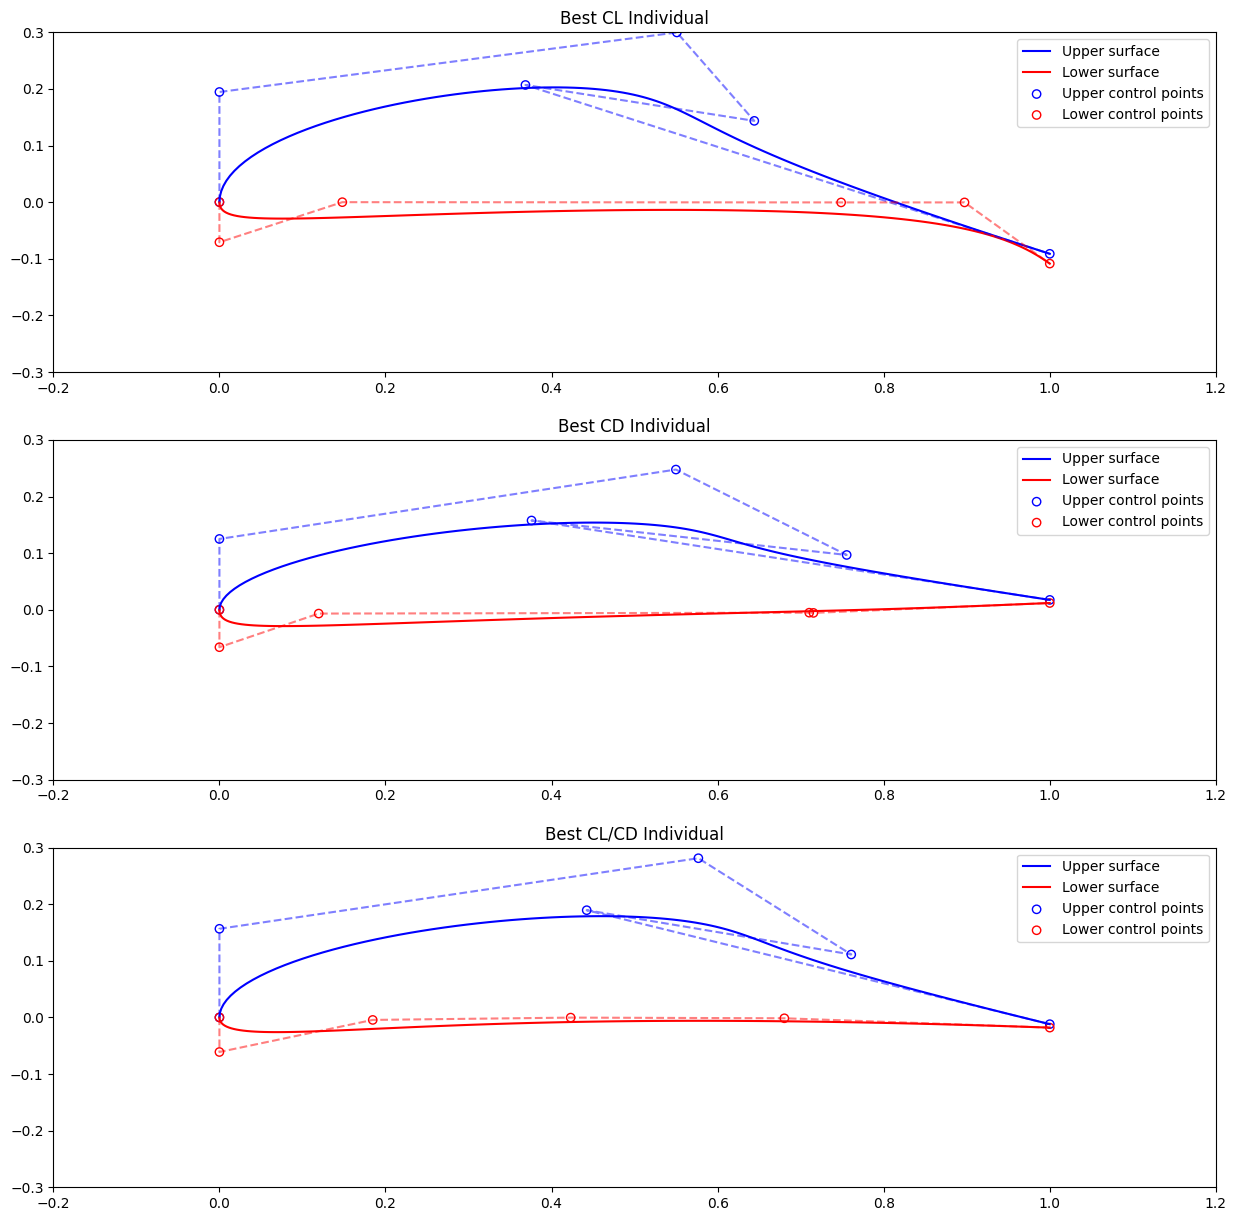

In [7]:
from utils.bezier_parametrization import BezierAirfoil
control_points_shape = (6, 6)
with open('data/runs/01/checkpoint_name_gen_149.pkl', 'rb'):
    cp = pickle.load(open(f'data/runs/{run}/checkpoint_name_gen_149.pkl', 'rb'))
    population = cp["population"]
    pareto = cp["pareto"]
    front = [ind for ind in pareto if ind.fitness.values[0] <= 0.02 and ind.fitness.values[1] >= 0.9]
                     
best_cl_individual = max(front, key=lambda ind: ind.fitness.values[1])
best_cd_individual = min(front, key=lambda ind: ind.fitness.values[0])
best_cl_o_cd_individual = max(front, key=lambda ind: ind.fitness.values[1] / ind.fitness.values[0])

best_cl_airfoil = BezierAirfoil(best_cl_individual, shape=control_points_shape)
best_cd_airfoil = BezierAirfoil(best_cd_individual, shape=control_points_shape)
best_cl_o_cd_airfoil = BezierAirfoil(best_cl_o_cd_individual, shape=control_points_shape)

fig, axs = plt.subplots(3, 1, figsize=(15, 15))
ax1 = axs[0]
ax2 = axs[1]
ax3 = axs[2]
best_cl_airfoil.plot(ax1)
best_cd_airfoil.plot(ax2)
best_cl_o_cd_airfoil.plot(ax3)
ax1.set_title("Best CL Individual")
ax2.set_title("Best CD Individual")
ax3.set_title("Best CL/CD Individual")
plt.show()

In [5]:
from pprint import pprint
from utils.xfoil_adapter import XFoilAdapter


with XFoilAdapter(timeout=12) as xfoil:
    airfoils = [best_cl_airfoil, best_cd_airfoil, best_cl_o_cd_airfoil]
    xfoil.set_airfoils(airfoils=airfoils)
    xfoil.set_run_condition(
        reynolds=3e6,
        mach=0,
        alphas=[8],
    )
    results = xfoil.run()

pprint(results)

array([[{'metadata': {'name': 'C:\\Users\\HUGO-S~1\\AppData\\Local\\Temp\\tmp9je5wxg6.dat', 'mach': 0.0, 'reynolds': 3000000, 'alphas': array([8.]), 'panels': 300, 'n_crit': 9, 'max_iterations': 100, 'save_name': None}, 'result': {'alpha': [8.0], 'CL': [3.3382], 'CD': [0.01693], 'CDp': [0.01419], 'CM': [-0.3851], 'Top_Xtr': [0.4965], 'Bot_Xtr': [0.8769]}},
        {'metadata': {'name': 'C:\\Users\\HUGO-S~1\\AppData\\Local\\Temp\\tmpkkodzvvx.dat', 'mach': 0.0, 'reynolds': 3000000, 'alphas': array([8.]), 'panels': 300, 'n_crit': 9, 'max_iterations': 100, 'save_name': None}, 'result': {'alpha': [8.0], 'CL': [1.4431], 'CD': [0.00527], 'CDp': [0.00247], 'CM': [-0.1272], 'Top_Xtr': [0.5657], 'Bot_Xtr': [1.0]}},
        {'metadata': {'name': 'C:\\Users\\HUGO-S~1\\AppData\\Local\\Temp\\tmp9o7jz2a8.dat', 'mach': 0.0, 'reynolds': 3000000, 'alphas': array([8.]), 'panels': 300, 'n_crit': 9, 'max_iterations': 100, 'save_name': None}, 'result': {'alpha': [8.0], 'CL': [2.0295], 'CD': [0.00687], 'CDp'

In [6]:
from utils.save_coordinates_to_dat_file import save_coordinates_to_dat_file

with open("data/best_cl_airfoil.dat", "wt") as f:
    save_coordinates_to_dat_file(f, best_cl_airfoil.get_coordinates())
with open("data/best_cd_airfoil.dat", "wt") as f:
    save_coordinates_to_dat_file(f, best_cd_airfoil.get_coordinates())
with open("data/best_cl_o_cd_airfoil.dat", "wt") as f:
    save_coordinates_to_dat_file(f, best_cl_o_cd_airfoil.get_coordinates())